In [1]:
import nltk
import pandas as pd
import glob
chars = ['narr', 'Adam', 'Eve', 'God', 'the_Son', 'Satan', 'Michael', 'Raphael']
files = glob.glob('sp/*')
#chars = [file[3:] for file in files]
import matplotlib as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,4)

In [2]:
charList = []
charDict = {}
for char in chars: 
    raw = open('sp/' + char).read().lower()
    #tokens = nltk.word_tokenize(raw)
    tokenizer = nltk.RegexpTokenizer('[a-zA-Z]\w+\'?\w*') # A custom regex tokenizer. 
    tokens = tokenizer.tokenize(raw)
    text = nltk.Text(tokens, name=char)
    charList.append(text)
    charDict[char] = text

In [3]:
corpus = nltk.TextCollection(charList)

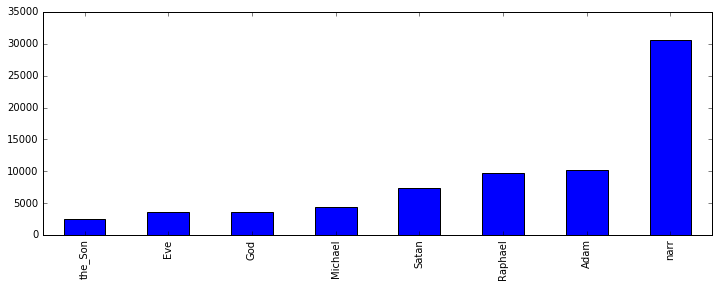

In [4]:
lengths = {char: len(charDict[char]) for char in chars}
pd.Series(lengths).sort_values().plot(kind='bar')

In [5]:
allWords = [] 
for char in charList: 
    for token in char.tokens: 
        if token not in allWords: 
            allWords.append(token)

In [6]:
tfidfs = {}
for word in allWords:
    scores = [] 
    for char in chars: 
        score = corpus.tf_idf(word, charDict[char])
        scores.append(score)
    tfidfs[word] = scores

In [7]:
df = pd.DataFrame(tfidfs, index=chars)
df

,aarons,abandon,abandoned,abarim,abashed,abassin,abated,abbana,abdiel,abhor,...,zealous,zenith,zephir,zephon,zephyr,zephyrus,zion,zodiac,zone,zophiel
narr,0.000068,0.000000,0.000068,0.000068,0.000339,0.000068,0.000068,0.000068,0.000136,0.000000,...,0.000068,0.000136,0.000068,0.000136,0.000068,0.000068,0.000339,0.000000,0.000032,0.000000
Adam,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000096,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000203,0.000096,0.000000
Eve,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
God,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
the_Son,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Satan,0.000000,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000132,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Michael,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000224,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Raphael,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000427,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000101,0.000214


In [8]:
def getDistinctiveWords(char, num=10): 
    s = pd.Series(df.loc[char])
    print(s.sort_values(ascending=False)[:10])

In [9]:
getDistinctiveWords('Adam')

my         0.001383
we         0.001265
why        0.001016
our        0.000822
sustain    0.000677
bone       0.000677
timely     0.000610
prime      0.000575
feel       0.000542
rib        0.000542
Name: Adam, dtype: float64


In [10]:
for char in chars: 
    print(char)
    print('---')
    getDistinctiveWords(char)
    print('---')

narr
---
replied    0.001280
fiend      0.001085
sat        0.000960
eve        0.000816
gate       0.000704
spake      0.000690
began      0.000656
thrice     0.000610
jove       0.000610
she        0.000610
Name: narr, dtype: float64
---
Adam
---
my         0.001383
we         0.001265
why        0.001016
our        0.000822
sustain    0.000677
bone       0.000677
timely     0.000610
prime      0.000575
feel       0.000542
rib        0.000542
Name: Adam, dtype: float64
---
Eve
---
we            0.001675
forbids       0.001360
our           0.001296
dreamed       0.001153
firmness      0.001153
earliest      0.001153
glistering    0.001153
early         0.001153
my            0.001111
sweet         0.000912
Name: Eve, dtype: float64
---
God
---
redeem        0.001534
my            0.001441
heir          0.001150
friend        0.001150
disobeys      0.001150
vicegerent    0.001150
breaks        0.001150
loosing       0.001150
hell          0.000875
dye           0.000814
Name: God, dty